In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)


In [27]:
base.classes.keys()


['measurement', 'station']

In [28]:
# View all of the classes that automap found


In [29]:
measurements = base.classes.measurement
station = base.classes.station

In [30]:
# Save references to each table


In [31]:
session = Session(engine)

In [32]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [33]:
session.query(measurements.date).order_by(measurements.date.desc()).first()

('2017-08-23',)

In [34]:
# Find the most recent date in the data set.


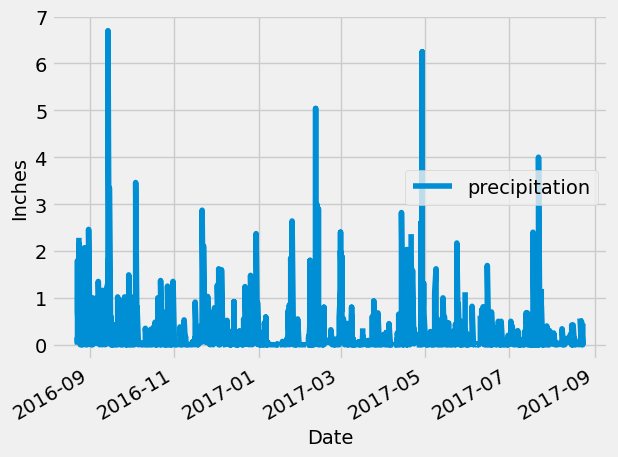

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
date_precipitaion = session.query(measurements.date,measurements.prcp).\
                    filter(measurements.date>= '2016-08-23').\
                    order_by(measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date_precipitaion, columns=['date','precipitation'])

# Sort the dataframe by date
df.sort_values('date')

df['date'] = pd.to_datetime(df['date'])
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation')
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
session.query(func.count(station.station)).all()

[(9,)]

In [38]:
# Design a query to calculate the total number of stations in the dataset


In [39]:
session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [41]:
session.query(func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).\
                                filter(measurements.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


<function matplotlib.pyplot.show(close=None, block=None)>

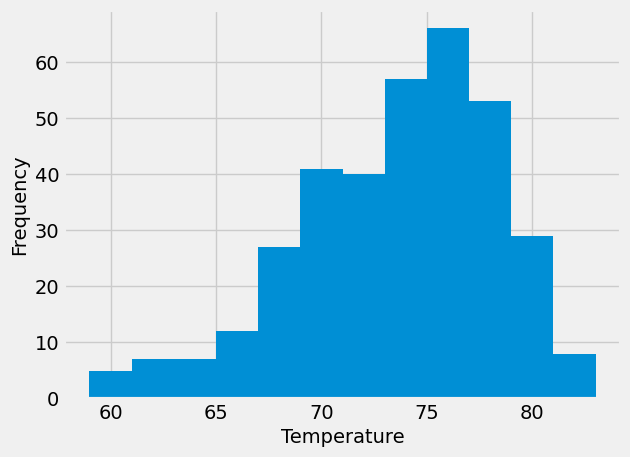

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_freq = session.query(measurements.tobs).\
                    filter(measurements.date >= '2016-08-23').\
                    filter(measurements.station == 'USC00519281').all()

# Saved the query results as a Pandas DataFrame. Explicitly set the column names as in the previous example
# df_temp = pd.DataFrame(temp_freq, columns = ['tobs'])
df_temp = pd.DataFrame(temp_freq)

plt.hist(df_temp['tobs'], bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [45]:
# Close Session
session.close()